# Изучение показателей производства выпечки

## О проекте

Работа связана с предприятием, выпускающим выпечку. 

Цель проекта -- изучение показателей подразделений и товаров, в результате которого будут сформированы выводы и рекомендации.

**Термины:**

Выпуск -- количество товаров, пригодных к продаже

Брак -- количество товаров, которые можно только утилизировать

## Исходные данные

Два файла формата `xlsx` с данными:

- `Тест брак`
- `Тест выпуск`

## Чтение и первичный анализ

In [1]:
# pandas
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table_1 = pd.read_excel('/Users/ilatti/Documents/cv/portfolio/food_factory/Тест выпуск.xlsx')
table_2 = pd.read_excel('/Users/ilatti/Documents/cv/portfolio/food_factory/Тест брак.xlsx')

In [3]:
def basic_info(df):
    print(df.info())
    display(df.head())

In [4]:
basic_info(table_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Дата           4043 non-null   object
 1   Товар          4043 non-null   object
 2   Выпуск         4043 non-null   int64 
 3   Подразделение  4043 non-null   object
dtypes: int64(1), object(3)
memory usage: 126.5+ KB
None


,Дата,Товар,Выпуск,Подразделение
0,03.01.2022 0:00:02,Товар 1,33900,Подразделение 1
1,03.01.2022 0:00:02,Товар 2,2640,Подразделение 1
2,03.01.2022 0:00:02,Товар 20,2688,Подразделение 1
3,03.01.2022 0:00:01,Товар 16,562,Подразделение 1
4,03.01.2022 0:00:01,Товар 17,621,Подразделение 1


In [5]:
basic_info(table_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Дата           5359 non-null   object
 1   Товар          5359 non-null   object
 2   Брак           5359 non-null   int64 
 3   Подразделение  5359 non-null   object
dtypes: int64(1), object(3)
memory usage: 167.6+ KB
None


,Дата,Товар,Брак,Подразделение
0,03.01.2022 0:00:02,Товар 1,498,Подразделение 1
1,03.01.2022 0:00:02,Товар 2,20,Подразделение 1
2,03.01.2022 0:00:02,Товар 3,33,Подразделение 1
3,03.01.2022 0:00:02,Товар 4,6,Подразделение 1
4,03.01.2022 0:00:02,Товар 5,16,Подразделение 1


- Таблицы считались корректно
- Пропусков в данных нет
- Для работы с датами приведем их к типу `datetime` 
- Названия столбцов изменять на латиницу не будем, потому что в дальнейшем задании фигурируют названия на кириллице 

## Предобработка

### Преобразование типов данных

Преобразуем дату:

In [6]:
for i in [table_1, table_2]:
    i['Дата'] = pd.to_datetime(i['Дата'], format='%d.%m.%Y %H:%M:%S')

In [7]:
basic_info(table_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           4043 non-null   datetime64[ns]
 1   Товар          4043 non-null   object        
 2   Выпуск         4043 non-null   int64         
 3   Подразделение  4043 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 126.5+ KB
None


,Дата,Товар,Выпуск,Подразделение
0,2022-01-03 00:00:02,Товар 1,33900,Подразделение 1
1,2022-01-03 00:00:02,Товар 2,2640,Подразделение 1
2,2022-01-03 00:00:02,Товар 20,2688,Подразделение 1
3,2022-01-03 00:00:01,Товар 16,562,Подразделение 1
4,2022-01-03 00:00:01,Товар 17,621,Подразделение 1


In [8]:
basic_info(table_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           5359 non-null   datetime64[ns]
 1   Товар          5359 non-null   object        
 2   Брак           5359 non-null   int64         
 3   Подразделение  5359 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 167.6+ KB
None


,Дата,Товар,Брак,Подразделение
0,2022-01-03 00:00:02,Товар 1,498,Подразделение 1
1,2022-01-03 00:00:02,Товар 2,20,Подразделение 1
2,2022-01-03 00:00:02,Товар 3,33,Подразделение 1
3,2022-01-03 00:00:02,Товар 4,6,Подразделение 1
4,2022-01-03 00:00:02,Товар 5,16,Подразделение 1


Определим, несет ли полезную нагрузку часть даты с указанием времени:

In [9]:
table_1['Дата'].dt.time.value_counts()

00:00:01    4038
00:00:02       4
00:00:03       1
Name: Дата, dtype: int64

In [10]:
table_2['Дата'].dt.time.value_counts()

00:00:02    5341
00:00:03      13
16:13:34       3
00:00:00       2
Name: Дата, dtype: int64

- Это явно формат ведения логов, но необходимо уточнить: почему иногда время отличается от заданного? Ручная запись?
- Полезной нагрузки указание на время не несет, особенно в контексте задачи
- Избавимся от части со временем:

In [11]:
for i in [table_1, table_2]:
    i['Дата'] = i['Дата'].dt.normalize()

In [12]:
basic_info(table_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           4043 non-null   datetime64[ns]
 1   Товар          4043 non-null   object        
 2   Выпуск         4043 non-null   int64         
 3   Подразделение  4043 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 126.5+ KB
None


,Дата,Товар,Выпуск,Подразделение
0,2022-01-03,Товар 1,33900,Подразделение 1
1,2022-01-03,Товар 2,2640,Подразделение 1
2,2022-01-03,Товар 20,2688,Подразделение 1
3,2022-01-03,Товар 16,562,Подразделение 1
4,2022-01-03,Товар 17,621,Подразделение 1


In [13]:
basic_info(table_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           5359 non-null   datetime64[ns]
 1   Товар          5359 non-null   object        
 2   Брак           5359 non-null   int64         
 3   Подразделение  5359 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 167.6+ KB
None


,Дата,Товар,Брак,Подразделение
0,2022-01-03,Товар 1,498,Подразделение 1
1,2022-01-03,Товар 2,20,Подразделение 1
2,2022-01-03,Товар 3,33,Подразделение 1
3,2022-01-03,Товар 4,6,Подразделение 1
4,2022-01-03,Товар 5,16,Подразделение 1


### Изучение дубликатов

Проверим наличие неявных дубликатов в названиях товаров и подразделений:

In [14]:
for i in [table_1, table_2]:
    print(i['Товар'].sort_values().unique(), '\n')
    print(i['Подразделение'].unique())
    print('-' * 50)

['Товар 1' 'Товар 10' 'Товар 11' 'Товар 12' 'Товар 13' 'Товар 14'
 'Товар 15' 'Товар 16' 'Товар 17' 'Товар 18' 'Товар 19' 'Товар 2'
 'Товар 20' 'Товар 21' 'Товар 22' 'Товар 23' 'Товар 3' 'Товар 4' 'Товар 5'
 'Товар 6' 'Товар 7' 'Товар 8' 'Товар 9'] 

['Подразделение 1' 'Подразделение 2']
--------------------------------------------------
['Товар 1' 'Товар 10' 'Товар 11' 'Товар 12' 'Товар 13' 'Товар 14'
 'Товар 15' 'Товар 16' 'Товар 17' 'Товар 18' 'Товар 19' 'Товар 2'
 'Товар 20' 'Товар 21' 'Товар 22' 'Товар 23' 'Товар 3' 'Товар 4' 'Товар 5'
 'Товар 6' 'Товар 7' 'Товар 8' 'Товар 9'] 

['Подразделение 1' 'Подразделение 2']
--------------------------------------------------


- Неявных дубликатов не выявлено
- В таблицах полное совпадение ассортимента товаров и видов подразделений

Проверим на наличие полных дубликатов

In [15]:
for i in [table_1, table_2]:
    print(i.duplicated().sum())
    print('-' * 50)

0
--------------------------------------------------
36
--------------------------------------------------


Во второй таблице есть 36 дубликатов, рассмотрим подробнее:

In [16]:
(table_2[table_2.duplicated(keep=False)]
 .sort_values(by=['Товар', 'Брак'])
 .head(18))

,Дата,Товар,Брак,Подразделение
3083,2022-06-20,Товар 10,2,Подразделение 1
3090,2022-06-20,Товар 10,2,Подразделение 1
3107,2022-06-21,Товар 10,3,Подразделение 1
3117,2022-06-21,Товар 10,3,Подразделение 1
1732,2022-04-10,Товар 10,6,Подразделение 1
1740,2022-04-10,Товар 10,6,Подразделение 1
1088,2022-03-03,Товар 11,1,Подразделение 1
1098,2022-03-03,Товар 11,1,Подразделение 1
2444,2022-05-19,Товар 11,1,Подразделение 1
2454,2022-05-19,Товар 11,1,Подразделение 1


Удалим дубликаты, чтобы не искажать данные:

In [17]:
table_2 = table_2.drop_duplicates()
table_2.duplicated().sum()

0

Удаление успешно

Проверим наличие дубликатов по дате, товару и подразделению (несколько записей в один день не несет полезной нагрузки и усложнит процесс анализа)

In [18]:
for i in [table_1, table_2]:
    print(i.duplicated(subset=['Дата', 'Товар', 'Подразделение']).sum())
    print('-' * 50)

0
--------------------------------------------------
1569
--------------------------------------------------


В таблице с браком существуют несколько записей в одну дату для одного товара и подразделения, избавимся от них:

In [19]:
table_2 = (table_2.groupby(['Дата', 'Товар', 'Подразделение'], as_index=False)
              .agg({'Брак':'sum'}))


In [20]:
table_2.duplicated(subset=['Дата', 'Товар', 'Подразделение']).sum()

0

In [21]:
basic_info(table_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           3754 non-null   datetime64[ns]
 1   Товар          3754 non-null   object        
 2   Подразделение  3754 non-null   object        
 3   Брак           3754 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 117.4+ KB
None


,Дата,Товар,Подразделение,Брак
0,2022-01-01,Товар 10,Подразделение 1,401
1,2022-01-01,Товар 11,Подразделение 1,134
2,2022-01-01,Товар 12,Подразделение 1,129
3,2022-01-01,Товар 13,Подразделение 1,271
4,2022-01-01,Товар 14,Подразделение 1,587


### Аномальные значения

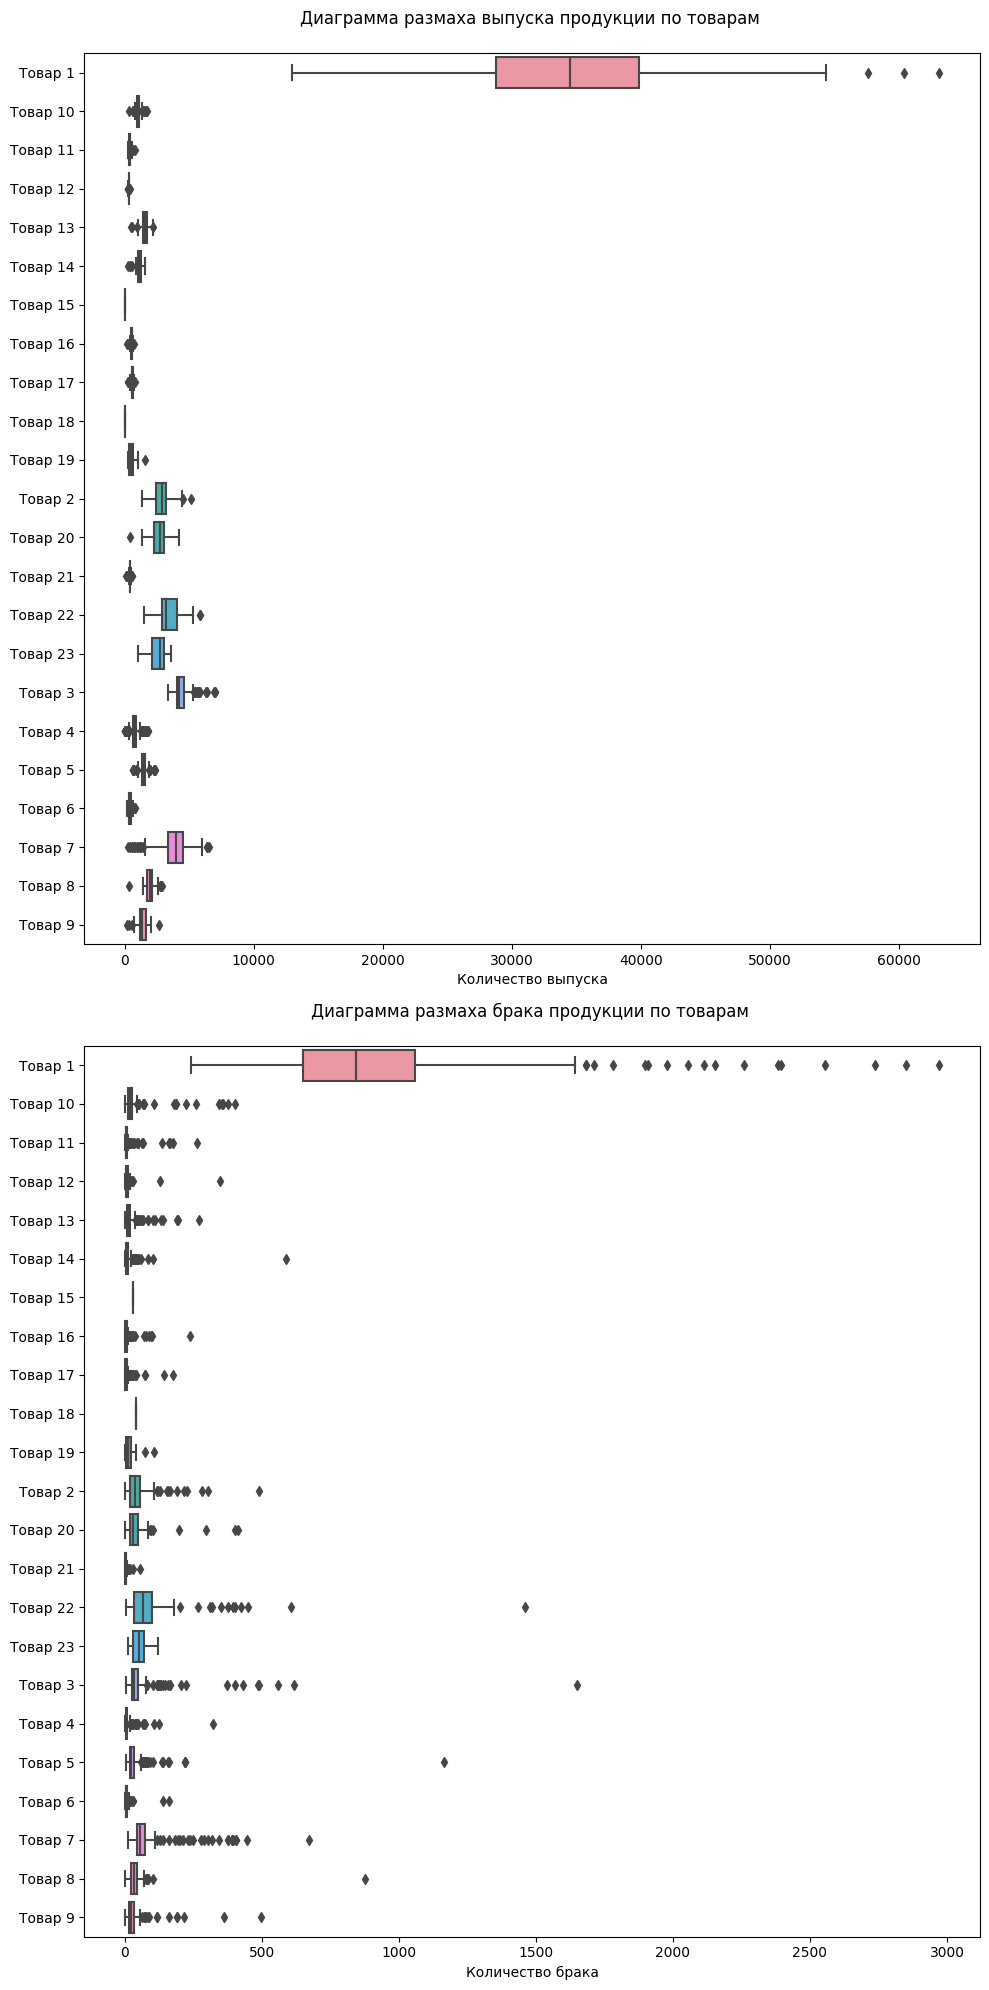

In [22]:
fig, ax = plt.subplots(2, 1)
fig.set(size_inches=(10, 20), tight_layout=True)
sns.color_palette('deep')

sns.boxplot(data=table_1.sort_values(by='Товар'), x='Выпуск', y='Товар', ax=ax[0]);
ax[0].set(ylabel=None, xlabel='Количество выпуска', title='Диаграмма размаха выпуска продукции по товарам \n');

sns.boxplot(data=table_2.sort_values(by='Товар'), x='Брак', y='Товар', ax=ax[1]);
ax[1].set(ylabel=None, xlabel='Количество брака', title='Диаграмма размаха брака продукции по товарам \n');

- `Товар 1` -- самый выпускаемый, оставшиеся товары далеко позади, из-за этого не видны их диаграммы
- Построим диаграммы без `Товара 1`:

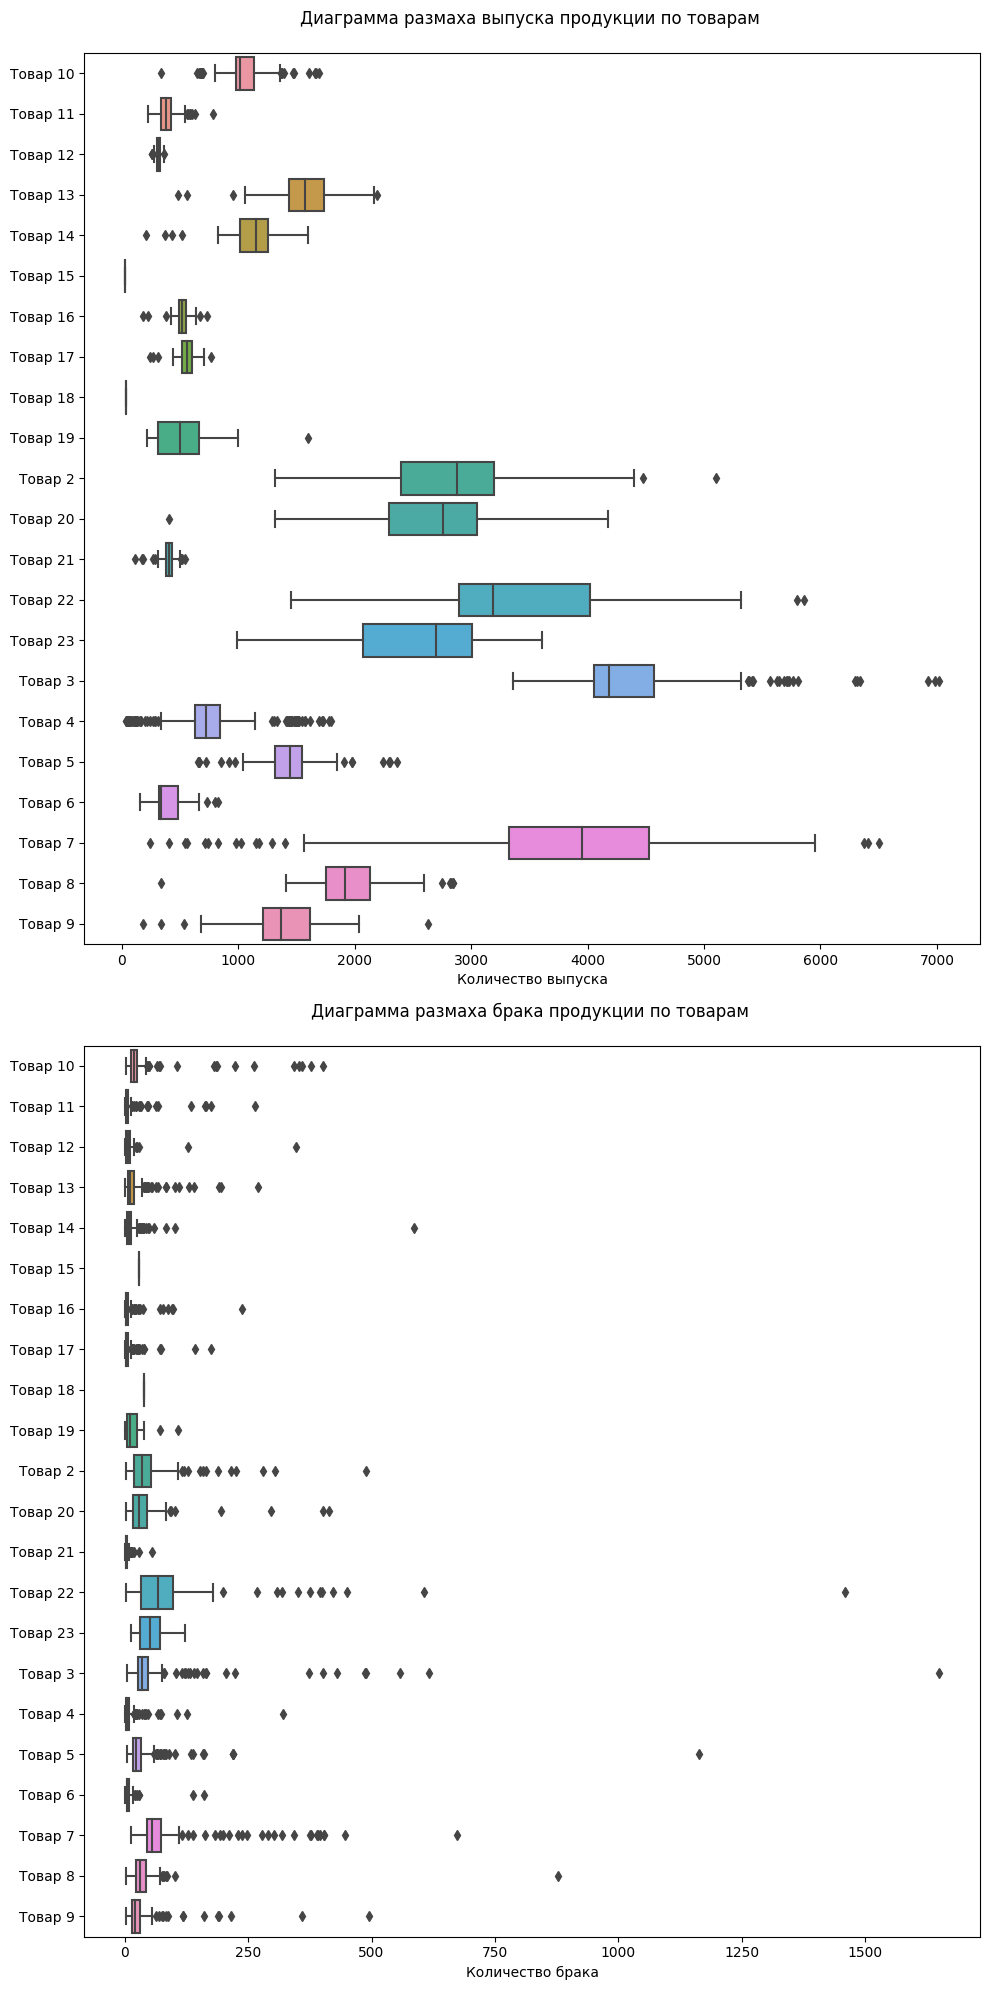

In [23]:
fig, ax = plt.subplots(2, 1)
fig.set(size_inches=(10, 20), tight_layout=True)

sns.boxplot(data=table_1.query('Товар != "Товар 1"').sort_values(by='Товар'), x='Выпуск', y='Товар', ax=ax[0]);
ax[0].set(ylabel=None, xlabel='Количество выпуска', title='Диаграмма размаха выпуска продукции по товарам \n');

sns.boxplot(data=table_2.query('Товар != "Товар 1"').sort_values(by='Товар'), x='Брак', y='Товар', ax=ax[1]);
ax[1].set(ylabel=None, xlabel='Количество брака', title='Диаграмма размаха брака продукции по товарам \n');

- В данных значительное количество выбросов
- Аномально больших значений в количестве брака больше, чем в количестве выпуска, что логично: в производстве всегда что-то может пойти не так
- Выбросы оставим как есть, поскольку они характеризуют статистику технологического процесса, которую изучим далее

Проверим временной интервал двух таблиц: совпадает ли он?

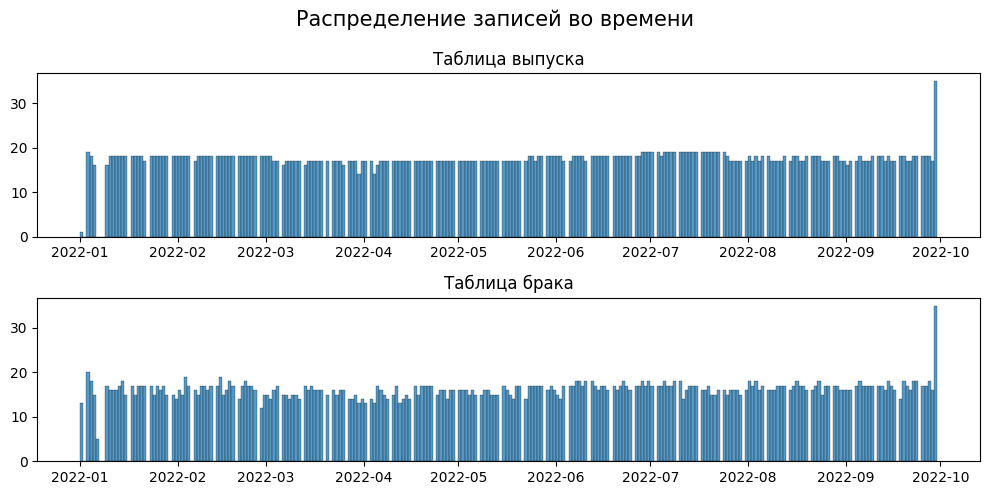

In [24]:
fig, ax = plt.subplots(2, 1)
fig.set(size_inches=(10, 5), tight_layout=True)
fig.suptitle('Распределение записей во времени', fontsize=15)

sns.histplot(data=table_1, x='Дата', ax=ax[0], binwidth=1);
ax[0].set(ylabel=None, xlabel=None, title='Таблица выпуска');

sns.histplot(data=table_2, x='Дата', ax=ax[1], binwidth=1);
ax[1].set(ylabel=None, xlabel=None, title='Таблица брака');

Временной интервал таблиц совпадает

### **Вывод**

- Дата приведена к типу `datetime`
- Обнаружено 36 полных дубликатов в таблице с браком, дублирующиеся значения удалены
- В таблице с браком присутствовали 1569 лишних записей для конкретного дня/товара/подразделения
    - Записи заменены одной записью для этого дня/товара/подразделения с суммарным количеством брака

## Решение задания

**Сначала объединим исходные таблицы**

- Для корректного соединения таблиц необходимо совпадение трех полей: дата, товар и подразделение; тогда мы будем уверены в том, что это соответствующие друг другу количества брака и выпуска
- Однако, в первой таблице больше записей (вероятно, это дни для товаров/подразделений, прошедшие без брака вовсе)
    - Cохраним все записи первой таблицы при объединении:

In [25]:
table_3 = table_1.merge(table_2, 
                        on=['Дата', 'Товар', 'Подразделение'], 
                        how='left')

In [26]:
basic_info(table_3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 4042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           4043 non-null   datetime64[ns]
 1   Товар          4043 non-null   object        
 2   Выпуск         4043 non-null   int64         
 3   Подразделение  4043 non-null   object        
 4   Брак           3688 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 189.5+ KB
None


,Дата,Товар,Выпуск,Подразделение,Брак
0,2022-01-03,Товар 1,33900,Подразделение 1,611.00
1,2022-01-03,Товар 2,2640,Подразделение 1,32.00
2,2022-01-03,Товар 20,2688,Подразделение 1,5.00
3,2022-01-03,Товар 16,562,Подразделение 1,10.00
4,2022-01-03,Товар 17,621,Подразделение 1,13.00


- Объединение успешно
- Заменим отсутствующие значения брака нулями в соответствии с гипотезой, что это дни без брака вовсе:

In [27]:
table_3 = table_3.fillna(0)

In [28]:
basic_info(table_3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 4042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           4043 non-null   datetime64[ns]
 1   Товар          4043 non-null   object        
 2   Выпуск         4043 non-null   int64         
 3   Подразделение  4043 non-null   object        
 4   Брак           4043 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 189.5+ KB
None


,Дата,Товар,Выпуск,Подразделение,Брак
0,2022-01-03,Товар 1,33900,Подразделение 1,611.00
1,2022-01-03,Товар 2,2640,Подразделение 1,32.00
2,2022-01-03,Товар 20,2688,Подразделение 1,5.00
3,2022-01-03,Товар 16,562,Подразделение 1,10.00
4,2022-01-03,Товар 17,621,Подразделение 1,13.00


Вернем целочисленный тип полю `Брак`:

In [29]:
table_3['Брак'] = table_3['Брак'].astype('int')

In [30]:
basic_info(table_3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 4042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           4043 non-null   datetime64[ns]
 1   Товар          4043 non-null   object        
 2   Выпуск         4043 non-null   int64         
 3   Подразделение  4043 non-null   object        
 4   Брак           4043 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 189.5+ KB
None


,Дата,Товар,Выпуск,Подразделение,Брак
0,2022-01-03,Товар 1,33900,Подразделение 1,611
1,2022-01-03,Товар 2,2640,Подразделение 1,32
2,2022-01-03,Товар 20,2688,Подразделение 1,5
3,2022-01-03,Товар 16,562,Подразделение 1,10
4,2022-01-03,Товар 17,621,Подразделение 1,13


**Составим сводную таблицу по товарам/неделям/подразделениям**

Добавим столбец с номером недели:

In [31]:
table_3['Неделя'] = table_3['Дата'].dt.isocalendar().week
table_3.head()

,Дата,Товар,Выпуск,Подразделение,Брак,Неделя
0,2022-01-03,Товар 1,33900,Подразделение 1,611,1
1,2022-01-03,Товар 2,2640,Подразделение 1,32,1
2,2022-01-03,Товар 20,2688,Подразделение 1,5,1
3,2022-01-03,Товар 16,562,Подразделение 1,10,1
4,2022-01-03,Товар 17,621,Подразделение 1,13,1


In [32]:
table_3['Неделя'].sort_values().unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 52]
Length: 40, dtype: UInt32

Что за запись с 52-ой недели?

In [33]:
table_3.query('Неделя == 52')

,Дата,Товар,Выпуск,Подразделение,Брак,Неделя
2451,2022-01-01,Товар 6,211,Подразделение 1,0,52


Заменим вручную на первую неделю года:

In [34]:
table_3.loc[2451, 'Неделя'] = 1
table_3['Неделя'].sort_values().unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39]
Length: 39, dtype: UInt32

Сгруппируем брак и выпуск по неделям/товарам/подразделениям:

In [35]:
table_3_weekly = (table_3
                  .groupby(['Неделя', 'Товар', 'Подразделение'], as_index=False)
                  .agg({'Выпуск':'sum', 
                        'Брак':'sum'}).sort_values(by=['Неделя', 'Товар', 'Подразделение']))
table_3_weekly.head()

,Неделя,Товар,Подразделение,Выпуск,Брак
0,1,Товар 1,Подразделение 1,97000,4138
1,1,Товар 10,Подразделение 1,3890,23
2,1,Товар 11,Подразделение 1,1353,15
3,1,Товар 12,Подразделение 1,1212,352
4,1,Товар 13,Подразделение 1,5750,22


Рассчитаем долю брака для каждой записи:

In [36]:
table_3_weekly['Доля брака'] = table_3_weekly['Брак'] / (table_3_weekly['Брак'] + table_3_weekly['Выпуск'])
table_3_weekly.head()

,Неделя,Товар,Подразделение,Выпуск,Брак,Доля брака
0,1,Товар 1,Подразделение 1,97000,4138,0.04
1,1,Товар 10,Подразделение 1,3890,23,0.01
2,1,Товар 11,Подразделение 1,1353,15,0.01
3,1,Товар 12,Подразделение 1,1212,352,0.23
4,1,Товар 13,Подразделение 1,5750,22,0.00


- Добавим категорию доли брака
- **Предлагается расширить категорию** `Средний` относительно ТЗ: **от 1 до 3 %** --> **от 1 до 5 %**, 
    - Иначе исходя из задания записи с `3 % < доля брака < 5 %` останутся без категории:

In [37]:
table_3_weekly['Категория доли брака'] = (table_3_weekly['Доля брака']
                                          .apply(lambda x: 'Низкий' if x < .03 else 
                                                 ('Высокий' if x >= .05 else 'Средний')))
table_3_weekly.head()

,Неделя,Товар,Подразделение,Выпуск,Брак,Доля брака,Категория доли брака
0,1,Товар 1,Подразделение 1,97000,4138,0.04,Средний
1,1,Товар 10,Подразделение 1,3890,23,0.01,Низкий
2,1,Товар 11,Подразделение 1,1353,15,0.01,Низкий
3,1,Товар 12,Подразделение 1,1212,352,0.23,Высокий
4,1,Товар 13,Подразделение 1,5750,22,0.00,Низкий


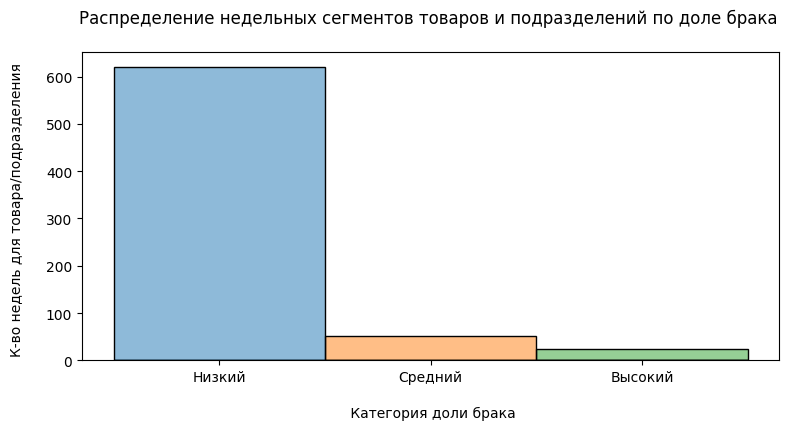

In [38]:
fig, ax = plt.subplots()
fig.set(size_inches=(9, 4))

sns.histplot(data=table_3_weekly.sort_values(by='Доля брака'), 
             x='Категория доли брака', 
             ax=ax, 
             hue='Категория доли брака', 
             legend=False);

ax.set(ylabel='К-во недель для товара/подразделения \n', 
       xlabel='\n Категория доли брака', 
       title='Распределение недельных сегментов товаров и подразделений по доле брака \n');

Очень хорошо, что средний и высокий брак на линии -- скорее исключение из правила :)

**Найдем общее количество выпущенных товаров**

In [39]:
print(f'За период с января по сентябрь 2022 года всего было выпущено {round(table_3["Выпуск"].sum() / 10**6, 1)} млн единиц товара')

За период с января по сентябрь 2022 года всего было выпущено 14.2 млн единиц товара


**Найдем топовое сочетание товар+подразделение по величине выпуска**

In [40]:
table_3.head()

,Дата,Товар,Выпуск,Подразделение,Брак,Неделя
0,2022-01-03,Товар 1,33900,Подразделение 1,611,1
1,2022-01-03,Товар 2,2640,Подразделение 1,32,1
2,2022-01-03,Товар 20,2688,Подразделение 1,5,1
3,2022-01-03,Товар 16,562,Подразделение 1,10,1
4,2022-01-03,Товар 17,621,Подразделение 1,13,1


In [41]:
(table_3
 .groupby(['Товар', 'Подразделение'], 
          as_index=False)['Выпуск']
 .sum()
 .sort_values(by='Выпуск', 
              ascending=False)
 .head(1))

,Товар,Подразделение,Выпуск
0,Товар 1,Подразделение 1,7855381


Лидерами являются `Товар 1` и `Подразделение 1`

**В каком подразделении больше всего брака продукции?**

In [42]:
dep_rank = (table_3
            .groupby('Подразделение', as_index=False)[['Выпуск', 'Брак']]
            .sum())

dep_rank['Доля брака'] = dep_rank['Брак'] / (dep_rank['Брак'] + dep_rank['Выпуск'])
dep_rank = dep_rank.sort_values(by='Доля брака', ascending=False)

dep_rank.style.format({'Выпуск': '{:.0f}',
                        'Брак': '{:.0f}',
                        'Доля брака': '{:.1%}'})

,Подразделение,Выпуск,Брак,Доля брака
0,Подразделение 1,13988169,317551,2.2%
1,Подразделение 2,217993,3395,1.5%


У `Подразделение 1` самый высокий процент брака

**По какому сочетанию товар+подразделение идет больше всего брака?**

In [43]:
dep_rank = (table_3
            .groupby(['Товар', 'Подразделение'], as_index=False)[['Выпуск', 'Брак']]
            .sum())

dep_rank['Доля брака'] = dep_rank['Брак'] / (dep_rank['Брак'] + dep_rank['Выпуск'])
dep_rank = dep_rank.sort_values(by='Доля брака', ascending=False).reset_index(drop=True)

dep_rank.head(5).style.format({'Выпуск': '{:.0f}',
                               'Брак': '{:.0f}',
                               'Доля брака': '{:.1%}'})

,Товар,Подразделение,Выпуск,Брак,Доля брака
0,Товар 18,Подразделение 1,40,40,50.0%
1,Товар 15,Подразделение 1,30,30,50.0%
2,Товар 19,Подразделение 2,14186,729,4.9%
3,Товар 12,Подразделение 1,15452,666,4.1%
4,Товар 22,Подразделение 1,377835,11706,3.0%


С большим отрывом самый высокий процент брака у `Товар 18` и `Товар 15` у `Подразделение 1` -- половина производимого отбраковывается

**Изучим динамику изменения выпуска и брака**

In [44]:
table_3_daily = (table_3
                  .groupby('Дата', as_index=False)
                  .agg({'Выпуск':'sum', 
                        'Брак':'sum'}).sort_values(by='Дата'))
table_3_daily.head()

,Дата,Выпуск,Брак
0,2022-01-01,211,0
1,2022-01-03,62601,894
2,2022-01-04,49487,1136
3,2022-01-05,31663,756
4,2022-01-09,42049,2918


- Рассчитаем суточный темп прироста выпуска и брака
- Считать будем по формуле: (выпуск[ j ] - выпуск[ начальный] ) / выпуск[ начальный ]
- Начальным периодом примем дату `2022-01-03`, т.к. показатели даты `2022-01-01` значительно отличаются от последующих (возможно неполный день работы)

In [45]:
success_init = table_3_daily.loc[1, 'Выпуск']
fail_init = table_3_daily.loc[1, 'Брак']

print(f'Начальное значение выпуска: {success_init}')
print(f'Начальное значение брака: {fail_init}')

Начальное значение выпуска: 62601
Начальное значение брака: 894


In [46]:
table_3_daily['Отн. темп прироста выпуска'] = table_3_daily['Выпуск'].apply(lambda x: (x - success_init) / success_init)
table_3_daily['Отн. темп прироста брака'] = table_3_daily['Брак'].apply(lambda x: (x - fail_init) / fail_init)
table_3_daily = table_3_daily.loc[1:, :]
table_3_daily.head()

,Дата,Выпуск,Брак,Отн. темп прироста выпуска,Отн. темп прироста брака
1,2022-01-03,62601,894,0.00,0.00
2,2022-01-04,49487,1136,-0.21,0.27
3,2022-01-05,31663,756,-0.49,-0.15
4,2022-01-09,42049,2918,-0.33,2.26
5,2022-01-10,38485,894,-0.39,0.00


Свернем таблицу помесячно:

In [47]:
table_3_monthly = table_3_daily.copy()
table_3_monthly['Месяц'] = table_3_monthly['Дата'].dt.month
table_3_monthly = table_3_monthly.groupby('Месяц', as_index=False)[['Выпуск', 'Брак']].sum()

table_3_monthly.head()

,Месяц,Выпуск,Брак
0,1,988738,23176
1,2,1173093,18578
2,3,1415169,27157
3,4,1411598,26709
4,5,1786457,36640


In [48]:
success_init = table_3_monthly.loc[0, 'Выпуск']
fail_init = table_3_monthly.loc[0, 'Брак']

print(f'Начальное значение выпуска: {success_init}')
print(f'Начальное значение брака: {fail_init}')

Начальное значение выпуска: 988738
Начальное значение брака: 23176


In [49]:
table_3_monthly['Отн. темп прироста выпуска'] = table_3_monthly['Выпуск'].apply(lambda x: (x - success_init) / success_init)
table_3_monthly['Отн. темп прироста брака'] = table_3_monthly['Брак'].apply(lambda x: (x - fail_init) / fail_init)

table_3_monthly.head()

,Месяц,Выпуск,Брак,Отн. темп прироста выпуска,Отн. темп прироста брака
0,1,988738,23176,0.00,0.00
1,2,1173093,18578,0.19,-0.20
2,3,1415169,27157,0.43,0.17
3,4,1411598,26709,0.43,0.15
4,5,1786457,36640,0.81,0.58


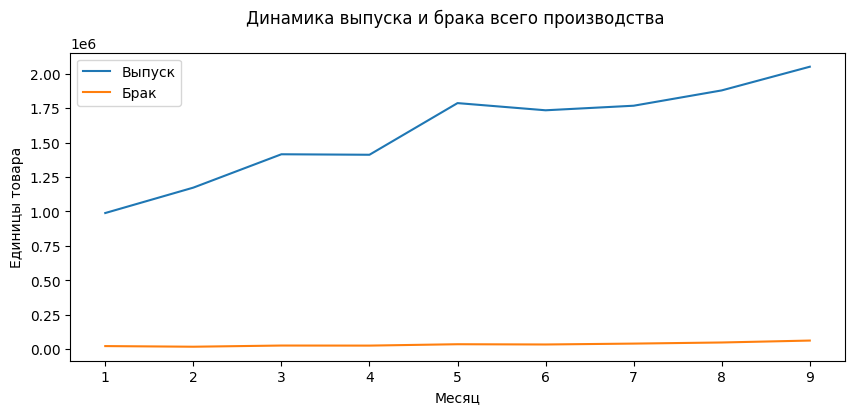

In [50]:
fig, ax = plt.subplots()
fig.set(size_inches=(10, 4))

sns.lineplot(data=table_3_monthly, x='Месяц', y='Выпуск', ax=ax, label='Выпуск');
sns.lineplot(data=table_3_monthly, x='Месяц', y='Брак', ax=ax, label='Брак');

ax.set(ylabel='Единицы товара', title='Динамика выпуска и брака всего производства \n');

Двукратный рост выпуска не обеспечил двукратный рост брака -- можно масштабировать производство и далее

**У какого подразделения наибольшая динамика роста выпуска?**

- Условимся, что наибольшая динамика роста определяется на последний интервал периода (по отношению к первому)
- Для ответа на вопрос используем помесячную динамику выпуска, чтобы избежать шума посуточной динамики

In [51]:
def make_montly_dep(df, dep):
    df = df.query('Подразделение == @dep')
    df['Месяц'] = df['Дата'].dt.month
    df = df.groupby('Месяц', as_index=False)[['Выпуск', 'Брак']].sum()
    return(df)

In [52]:
dep_1_monthly = table_3.copy()
dep_1_monthly = make_montly_dep(dep_1_monthly, "Подразделение 1")
dep_1_monthly

,Месяц,Выпуск,Брак
0,1,988949,23176
1,2,1173093,18578
2,3,1415169,27157
3,4,1411598,26709
4,5,1786457,36640
5,6,1731020,34828
6,7,1712190,41274
7,8,1788862,47228
8,9,1980831,61961


In [53]:
dep_2_monthly = table_3.copy()
dep_2_monthly = make_montly_dep(dep_2_monthly, "Подразделение 2")
dep_2_monthly

,Месяц,Выпуск,Брак
0,6,3328,0
1,7,55294,0
2,8,89751,2081
3,9,69620,1314


Скорее всего, в июне подразделение отработало не полный месяц, проверим гипотезу:

In [54]:
table_3.query('Подразделение == "Подразделение 2"').head()

,Дата,Товар,Выпуск,Подразделение,Брак,Неделя
2596,2022-06-28,Товар 23,988,Подразделение 2,0,26
2615,2022-06-29,Товар 23,1030,Подразделение 2,0,26
2634,2022-06-30,Товар 23,1310,Подразделение 2,0,26
2653,2022-07-01,Товар 23,1178,Подразделение 2,0,26
2689,2022-07-03,Товар 23,1492,Подразделение 2,0,26


Гипотеза подтвердилась, начальным интервалом периода для подразделения 2 примем июль, для подразделения 1 -- январь

In [55]:
success_init = []
success_init.append(dep_1_monthly.loc[0, 'Выпуск'])
success_init.append(dep_2_monthly.loc[1, 'Выпуск'])
success_init

[988949, 55294]

Расчитаем месячные темпы прироста выпуска:

In [56]:
counter = 0
for i in [dep_1_monthly, dep_2_monthly]:
    i['Отн. темп прироста выпуска'] = i['Выпуск'].apply(lambda x: (x - success_init[counter]) / success_init[counter])
    counter += 1

In [57]:
dep_1_monthly

,Месяц,Выпуск,Брак,Отн. темп прироста выпуска
0,1,988949,23176,0.00
1,2,1173093,18578,0.19
2,3,1415169,27157,0.43
3,4,1411598,26709,0.43
4,5,1786457,36640,0.81
5,6,1731020,34828,0.75
6,7,1712190,41274,0.73
7,8,1788862,47228,0.81
8,9,1980831,61961,1.00


In [58]:
dep_2_monthly = dep_2_monthly.loc[1:, :]
dep_2_monthly

,Месяц,Выпуск,Брак,Отн. темп прироста выпуска
1,7,55294,0,0.00
2,8,89751,2081,0.62
3,9,69620,1314,0.26


- **Подразделение 1** обладает наибольшей динамикой роста выпуска товаров: темп прироста выпуска на последний месяц периода составил **1.00**, т.е. рост в два раза
- У **подразделения 2** этот же показатель составил **0.26**

**У какого подразделения наибольшая динамика уменьшения количества брака?**

- Воспользуемся таблицами из предыдущего задания, но рассчитаем дополнительно месячные темпы прироста брака
- У подразделения 2 первый полноценный месяц работы прошел без брака, на следующий месяц брак появился, еще через месяц брак также присутствует
    - У подразделения 1 брак есть во все месяцы
    - Целый месяц без брака звучит скорее как счастливое исключение -- возможно брак не фиксировался в начале работы подразделения
    - Примем за начальный интервал второй полноценный месяц работы (август)

In [59]:
fail_init = []
fail_init.append(dep_1_monthly.loc[0, 'Брак'])
fail_init.append(dep_2_monthly.loc[2, 'Брак'])
fail_init

[23176, 2081]

Применим цикл из прошлого задания:

In [60]:
counter = 0
for i in [dep_1_monthly, dep_2_monthly]:
    i['Отн. темп прироста брака'] = i['Брак'].apply(lambda x: (x - fail_init[counter]) / fail_init[counter])
    counter += 1

In [61]:
dep_1_monthly

,Месяц,Выпуск,Брак,Отн. темп прироста выпуска,Отн. темп прироста брака
0,1,988949,23176,0.00,0.00
1,2,1173093,18578,0.19,-0.20
2,3,1415169,27157,0.43,0.17
3,4,1411598,26709,0.43,0.15
4,5,1786457,36640,0.81,0.58
5,6,1731020,34828,0.75,0.50
6,7,1712190,41274,0.73,0.78
7,8,1788862,47228,0.81,1.04
8,9,1980831,61961,1.00,1.67


In [62]:
dep_2_monthly = dep_2_monthly.loc[2:, :]
dep_2_monthly

,Месяц,Выпуск,Брак,Отн. темп прироста выпуска,Отн. темп прироста брака
2,8,89751,2081,0.62,0.00
3,9,69620,1314,0.26,-0.37


- Подразделение 2 обладает наибольшей динамикой уменьшения количества брака: работники снизили количество брака на 37 %
- Подразделение 1 наращивает количество брака: прирост составил 67 % от начала года

**Составим рейтинг товаров/подразделений по выпуску**

Воспользуемся таблицей, полученной ранее:

In [63]:
dep_rank = (dep_rank
            .sort_values(by='Выпуск', 
                         ascending=False)
            .reset_index(drop=True)
            .rename(columns={'Выпуск':'Сумма выпуска', 
                             'Брак':'Сумма брака'}))

dep_rank.head(10)

,Товар,Подразделение,Сумма выпуска,Сумма брака,Доля брака
0,Товар 1,Подразделение 1,7855381,214181,0.03
1,Товар 3,Подразделение 1,1005991,12239,0.01
2,Товар 7,Подразделение 1,871159,18701,0.02
3,Товар 2,Подразделение 1,645755,9299,0.01
4,Товар 20,Подразделение 1,608278,7075,0.01
5,Товар 8,Подразделение 1,449429,7793,0.02
6,Товар 22,Подразделение 1,377835,11706,0.03
7,Товар 13,Подразделение 1,365821,3992,0.01
8,Товар 5,Подразделение 1,331547,7269,0.02
9,Товар 9,Подразделение 1,318552,7113,0.02


Добавим столбец с нумерацией и поставим его первым:

In [64]:
dep_rank['№'] = dep_rank.reset_index().index + 1

cols = dep_rank.columns.tolist()
cols = cols[-1:] + cols[:-1]
dep_rank = dep_rank[cols]

dep_rank.head(10)

,№,Товар,Подразделение,Сумма выпуска,Сумма брака,Доля брака
0,1,Товар 1,Подразделение 1,7855381,214181,0.03
1,2,Товар 3,Подразделение 1,1005991,12239,0.01
2,3,Товар 7,Подразделение 1,871159,18701,0.02
3,4,Товар 2,Подразделение 1,645755,9299,0.01
4,5,Товар 20,Подразделение 1,608278,7075,0.01
5,6,Товар 8,Подразделение 1,449429,7793,0.02
6,7,Товар 22,Подразделение 1,377835,11706,0.03
7,8,Товар 13,Подразделение 1,365821,3992,0.01
8,9,Товар 5,Подразделение 1,331547,7269,0.02
9,10,Товар 9,Подразделение 1,318552,7113,0.02


## **Общий вывод**

**О проекте**

- В проекте исследованы показатели производства, отмечены топовые товары и подразделения, а также возможные точки роста для бизнеса
- Исходные данные предоставлены в виде двух таблиц `xlsx`: таблица с выпуском и таблица с браком продукции
- Перед основной частью исследования проведена предобработка и изучение данных

**Предобработка**

- Дата приведена к типу `datetime`
- Обнаружено 36 полных дубликатов в таблице с браком, дублирующиеся значения удалены
- В таблице с браком присутствовали 1569 лишних записей для конкретного дня/товара/подразделения
    - Записи заменены одной записью для этого дня/товара/подразделения с суммарным количеством брака
    
**Основная часть проекта**

- Исходные таблицы объединены по полям `Дата` `Товар` и `Подразделение` 
    - Значения из таблицы брака без соответствия таблице выпуска заменены нулями
- Построена сводная таблица по неделям/товарам/подразделениям
    - Для каждой таблицы получено суммарное количество выпуска и брака
    - Рассчитана доля брака в продукции
    - Проведена категоризация записей по доле брака: Низкий/Средний/Высокий
        - Категория "Средний" расширена относительно ТЗ для того, чтобы каждая запись была отнесена к категории (от 1 до 3 % --> от 1 до 5 %)
        - Подавляющее большинство записей относятся к категории "Низкий"
- За период с начала по сентябрь 2022 года всего выпущено 14.2 млн единиц товара
- Больше всего выпущено `Товар 1` в `Подразделение 1` в сравнении с другими сочетаниями товар/подразделение
- При этом `Подразделение 1` имеет самый высокий процент брака из двух подразделений
- Больше всего в `Подразделение 1` встречается брака в `Товар 18` и `Товар 15`: половина изделий отбраковывается (50 %)
    - Ближайший конкурент -- `Товар 19` имеет всего 4.9 % брака
- Суммарное производство за период отчета выросло более чем в два раза
    - Это не привело к двукратному росту количества брака
    - Масштабирование бизнеса проходит успешно
- Основной драйвер этого взрывного роста -- `Подразделение 1`, их производство возросло в два раза в месячном выражении за девять месяцев
    - `Подразделение 2` за три месяца полноценной работы стало выпускать на 26 % больше товаров
- Рост производства `Подразделение 1` привел к драматическому росту количества брака
    - За период отчета выпуск возрос на 100 %, при этом брак возрос на 167 %
- Масштабирование производства `Подразделение 2` протекает значительно лучше:
    - За период отчета выпуск возрос на 26 %, а брак уменьшился на 37 %  
    
 


**Рекомендации по сбору и хранению данных**

- Предлагается записывать информацию о браках один раз в сутки, если это возможно -- для удобства работы
- Рекомендуется в явном виде прописывать в логах нули (вместо отсутствия записи), если смена закрыта без брака: это позволит повысить уверенность выводов на основании данных